In [12]:
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from utils import *

from heamy.dataset import Dataset
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
data=california_housing.fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

In [14]:
ds = Dataset(x_train,y_train,x_test,y_test, use_cache=False)

In [15]:
clf1_0 = Ridge
clf1_0_params=dict(random_state=2112,alpha=0.01)
clf1_1 = RandomForestRegressor
clf1_1_params=dict(n_estimators=100,random_state=2121,n_jobs=-1)
clf1_2 = ExtraTreesRegressor
clf1_2_params=dict(n_estimators=400,random_state=2121,n_jobs=-1)
clf1_3 = GradientBoostingRegressor
clf1_3_params=dict(n_estimators=580,max_depth=4)

pipeline = ModelsPipeline(
    Regressor(estimator=clf1_0, dataset=ds, use_cache=False,parameters=clf1_0_params),
    Regressor(estimator=clf1_1, dataset=ds, use_cache=False,parameters=clf1_1_params),
    Regressor(estimator=clf1_2, dataset=ds, use_cache=False,parameters=clf1_2_params),
    Regressor(estimator=clf1_3, dataset=ds, use_cache=False,parameters=clf1_3_params),
)

stack_ds = pipeline.stack(k=4, seed=2121, add_diff=False, full_test=True)

In [16]:
clf2_0=Ridge
clf1_0_params=dict(random_state=2112,alpha=0.01)

clf = Regressor(dataset=stack_ds, estimator=clf2_0, use_cache=False)

In [17]:
clf.validate(k=3, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.3113388159913811, 0.30339510458647995, 0.301562838573643]
Mean accuracy: 0.30543225305050137
Standard Deviation: 0.004243026751143551
Variance: 1.800327601091979e-05


([array([1.752  , 3.588  , 5.00001, ..., 5.00001, 2.159  , 1.375  ]),
  array([1.393, 1.143, 3.398, ..., 2.978, 1.17 , 1.958]),
  array([1.552, 1.577, 1.031, ..., 2.237, 1.893, 1.875])],
 [array([2.15742434, 4.08649672, 5.01881829, ..., 4.85834726, 2.16422708,
         1.17178414]),
  array([1.30825958, 1.09750699, 3.69278697, ..., 3.19627816, 1.42253308,
         0.95262652]),
  array([1.53702716, 1.47806793, 1.28919893, ..., 2.10063144, 1.87904659,
         1.33836606])])

MSE -  0.20517652345656298
MAE -  0.3020910931569586


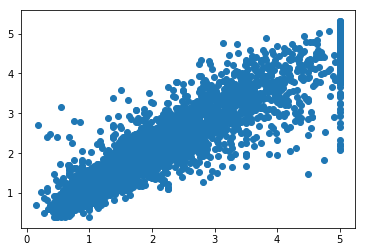

In [18]:
plt_sct(y_test,clf.predict())